In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
company = input("Enter a string: ")
path = "C:\\Users\\bhatt\\Desktop\\stockPredictionProject\\"+company+".csv"
print (path)

Enter a string:  ADANIGREEN


C:\Users\bhatt\Desktop\stockPredictionProject\ADANIGREEN.csv


In [3]:
df = pd.read_csv(path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,31.500000,7006229
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,32.599998,2895692
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,31.000000,1115553
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,29.650000,2854524
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,29.450001,1612972


In [4]:
df.dtypes
df['Date']=pd.to_datetime(df.Date)
df.shape

(1122, 7)

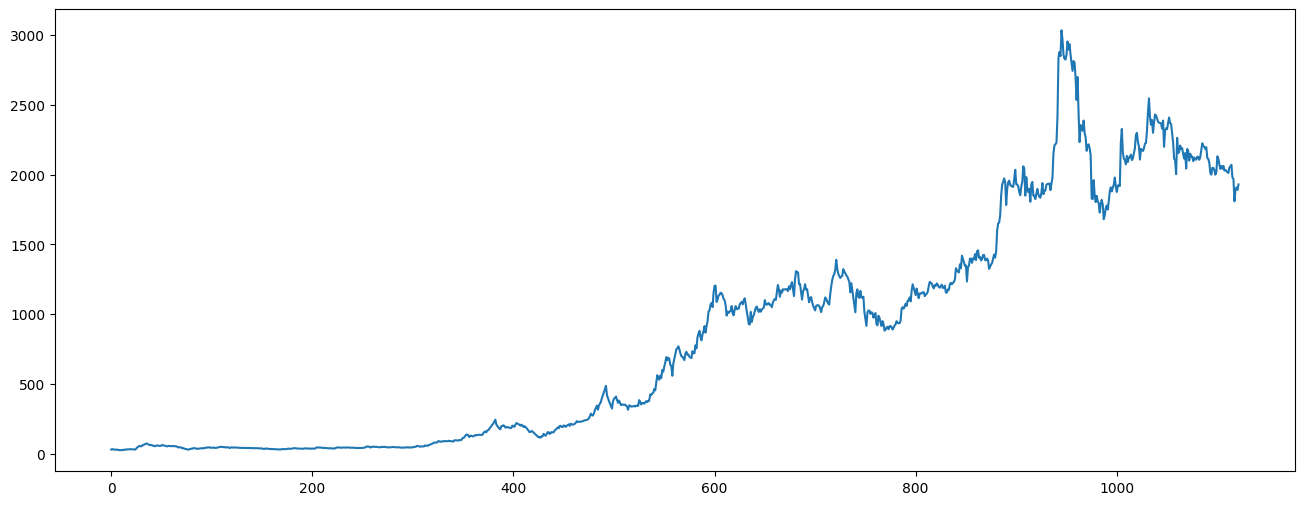

In [5]:
df.drop('Adj Close',axis=1,inplace=True)
df['Volume']=df['Volume'].astype(float)
df.dtypes

df.isnull().sum()
df.isna().any()

df_new = df[np.isfinite(df).all(1)]

df_new['Open'].plot(figsize=(16,6))

x=df_new[['Open','High','Low','Volume']]
y=df_new['Close']   

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  confusion_matrix,accuracy_score
regressor=LinearRegression()

In [8]:
regressor.fit(x_train,y_train)

print(regressor.coef_)

print(regressor.intercept_)

[-4.25542488e-01  7.31606504e-01  6.92372584e-01  4.83356604e-07]
0.26408517071502047


In [9]:
predicted=regressor.predict(x_test)
print(predicted)

[ 888.01215128 1862.39025272  188.42788774 2098.73121459  348.87783407
   37.11966881 1807.22887392 1047.8717746    49.6339609    36.47837592
   33.24349988  138.13307342 1837.51032353 1945.07030342   48.12874336
 2045.02083962  187.55115804  367.09889323   37.05693273 1020.07480062
   41.19863575  345.35191569   49.78171636 1076.8300878   397.26371122
  596.19715907  183.53509406 1184.05105338 1018.06319799  980.43341636
 1197.09709434  368.85724372 1435.4609473  1438.31770707  404.65352459
 1420.79698549   30.7579667  2203.22714936  848.43670054 1771.91507965
   62.02918867   38.93584926   49.25090655   47.05978332  549.84511762
 1144.6925411  1829.83792245   42.06598194  240.49133878   68.18946241
 1093.91554311   49.59383843  198.56723808 1069.02811892  123.59499798
   58.77872614  128.44541104 1198.51913329 2140.14258023   44.77056316
 1724.62321847 1025.83591871 1091.9301496  2045.24017048  137.87653565
 1919.70248331 2170.88801899   45.63401157 2668.05086798   45.82412448
  902.

In [10]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [11]:
print(dfr)

           Actual    Predicted
776    901.500000   888.012151
921   1860.050049  1862.390253
395    186.300003   188.427888
1015  2099.199951  2098.731215
511    347.350006   348.877834
...           ...          ...
667   1164.849976  1153.802603
253     50.200001    54.952777
1018  2273.699951  2248.484826
522    342.950012   345.544297
721   1314.250000  1327.124956

[281 rows x 2 columns]


In [12]:
dfr.sort_values("Actual",ascending=False)
dfr.sort_values("Predicted",ascending=False)

,Actual,Predicted
948,2882.800049,2925.042987
953,2882.800049,2916.310245
945,2911.949951,2845.389740
942,2792.399902,2844.470018
944,2970.500000,2828.335062
...,...,...
15,30.950001,31.036464
165,30.250000,30.880120
14,30.350000,30.757967
5,28.950001,29.355465


In [13]:
from sklearn import metrics
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, predicted))
print("Mean Squared Error:", metrics.mean_squared_error(y_test, predicted))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, predicted)))


Mean Absolute Error: 8.505640048561336
Mean Squared Error: 253.11707760130733
Root Mean Squared Error: 15.90965359777853


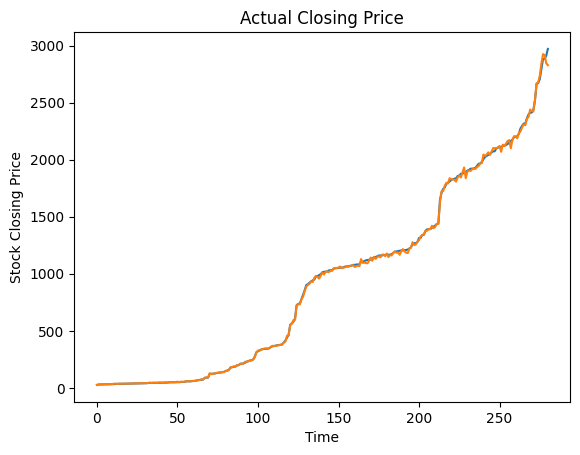

In [16]:
lst=[i for i in range(0,len(dfr.Actual))]
ak=dfr.head(len(dfr.Actual))
aka=ak.sort_values("Actual")

plt.plot(lst,aka)
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Actual Closing Price")
plt.show()

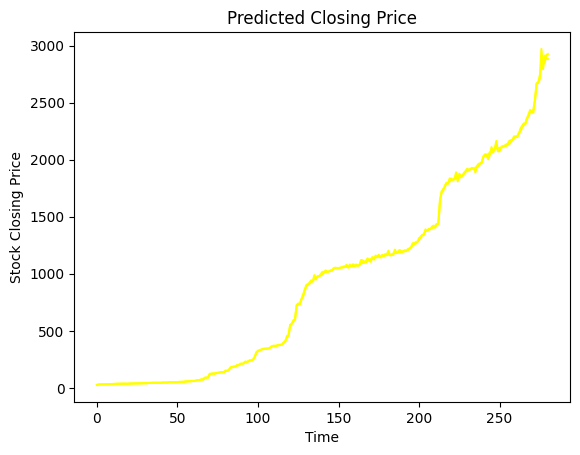

In [17]:
lst=[i for i in range(0,len(dfr.Actual))]
aak=ak.sort_values("Predicted")
plt.plot(lst,aak,color="Yellow")
plt.xlabel("Time")
plt.ylabel("Stock Closing Price")
plt.title("Predicted Closing Price")
plt.show()

In [ ]:
regressor.score(x_test,y_test)

